In [78]:
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import math
import torch
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline
from torch import nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from neuralprophet import NeuralProphet
sns.set_theme(style="whitegrid")
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [79]:
stock_data = yf.download('2330.TW',start='2016-01-01',end='2022-12-01')
stock_data_close = stock_data[['Close']]
#stock_data_close = stock_data_close[:-31].rename_axis('ds').reset_index()
stock_data_close = stock_data_close.rename_axis('ds').reset_index()
stock_data_close.columns = ['ds','y']
#df_train,df_test = stock_data_close[:int(stock_data_close.shape[0]*0.8)] ,stock_data_close[int(stock_data_close.shape[0]*0.8):]
print(stock_data_close.head(),"\nshape:",stock_data_close.shape)

[*********************100%***********************]  1 of 1 completed
          ds      y
0 2016-01-04  139.5
1 2016-01-05  138.0
2 2016-01-06  135.5
3 2016-01-07  133.0
4 2016-01-08  134.0 
shape: (1685, 2)


In [80]:
m = NeuralProphet()
#df_train, df_test = m.split_df(stock_data_close, freq="D", valid_p=0.2)
metrics = m.fit(stock_data_close,freq="D",)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.499% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 166


  0%|          | 0/131 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.82E-01, min: 6.54E-02


  0%|          | 0/131 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.82E-01, min: 5.57E-02
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.59E-01
Epoch[166/166]: 100%|██████████| 166/166 [00:19<00:00,  8.60it/s, SmoothL1Loss=0.00168, MAE=19.7, RMSE=27.3, Loss=0.00151, RegLoss=0]


INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.499% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.499% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


          ds      y  residual1       yhat1       trend  season_yearly  \
0 2016-01-04  139.5 -13.401962  126.098038  181.330963       7.079271   
1 2016-01-05  138.0  -9.284561  128.715439  181.658020       7.858782   
2 2016-01-06  135.5  -5.615219  129.884781  181.985077       8.692140   
3 2016-01-07  133.0  -1.815308  131.184692  182.312134       9.576243   
4 2016-01-08  134.0  -0.969421  133.030579  182.639191      10.507453   

   season_weekly  
0     -62.312195  
1     -60.801361  
2     -60.792431  
3     -60.703682  
4     -60.116062  
MSE: 768.396
MAE: 19.674


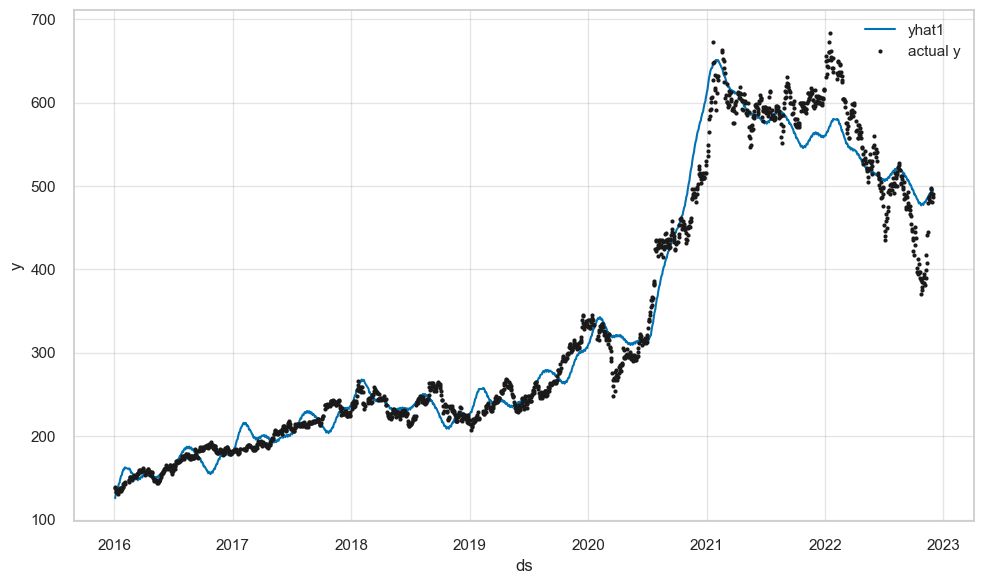

In [81]:
#future =m.make_future_dataframe(stock_data_close,periods=365)
#print(future.head())
forecast = m.predict(stock_data_close)

#df_fc = m.get_latest_forecast(forecast)
#print(df_test.head())
y = forecast['y']
y_pred = forecast['yhat1']
print(forecast.head())
print('MSE: %.3f'%(mean_squared_error(y,y_pred)))
print('MAE: %.3f'%(mean_absolute_error(y,y_pred)))
forecasts_plot = m.plot(forecast)